In [2]:
from QCircuit import *
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from scipy import constants
%matplotlib inline
from numpy import *

# 8 JUNCTIONS Kitaev like cross/ Phase prison


In [12]:
FQ8JJ = QCircuit()
FQ8JJ.add_element(QJosephsonJunction('JJA'), ['GND', '5'])
FQ8JJ.add_element(QJosephsonJunction('JJB'), ['1', '5'])
FQ8JJ.add_element(QJosephsonJunction('JJC'), ['2', '3'])
FQ8JJ.add_element(QJosephsonJunction('JJD'), ['1', '3'])
FQ8JJ.add_element(QJosephsonJunction('JJE'), ['6', '8'])
FQ8JJ.add_element(QJosephsonJunction('JJF'), ['7', '8'])
FQ8JJ.add_element(QJosephsonJunction('JJG'), ['3', '8'])
FQ8JJ.add_element(QJosephsonJunction('JJH'), ['4', '8'])


FQ8JJ.add_element(QCapacitance('CA'), ['GND', '5'])
FQ8JJ.add_element(QCapacitance('CB'), ['1', '5'])
FQ8JJ.add_element(QCapacitance('CC'), ['2', '3'])
FQ8JJ.add_element(QCapacitance('CD'), ['1', '3'])
FQ8JJ.add_element(QCapacitance('CE'), ['6', '8'])
FQ8JJ.add_element(QCapacitance('CF'), ['7', '8'])
FQ8JJ.add_element(QCapacitance('CG'), ['3', '8'])
FQ8JJ.add_element(QCapacitance('CH'), ['4', '8'])
        
phia = QVariable('φa')
phic = QVariable('φc')
phie = QVariable('φe')
phie1 = QVariable('φe1')

phia.create_grid(15, 1)
phic.create_grid(15, 1)
phie.create_grid(15, 1)
FQ8JJ.add_variable(phia)
FQ8JJ.add_variable(phic)
FQ8JJ.add_variable(phie)
FQ8JJ.add_variable(phie1)


FQ8JJ.map_nodes_linear(['GND', '1', '2', '3', '4', '5', '6', '7', '8'], 
                       ['φa', 'φc', 'φe', 'φe1'], 
                       np.asarray([[0,0,0,0], [0,0,0,1], [0,0,0,2], [0,1,0,2], [0,1,0,3], [-1,0,0,0], [-1,0,0,-1], [-1,0,0,-2], [-1,0,1,-1]]))

#EjEc_ratio = 80
alpha = 0.72
flux_steps = 64
#energies = np.zeros((flux_steps,flux_steps,2), dtype=np.float)
energies = np.zeros((flux_steps,4), dtype=np.float)

Ej = 200e9
Ec = 2*1.9e-19**2/3.5e-15/(2*np.pi*1.054e-34)
FQ8JJ.find_element('JJA').set_critical_current(Ej)
FQ8JJ.find_element('JJC').set_critical_current(Ej)
FQ8JJ.find_element('JJF').set_critical_current(Ej)
FQ8JJ.find_element('JJH').set_critical_current(Ej)
FQ8JJ.find_element('CA').set_capacitance(2/Ec)
FQ8JJ.find_element('CC').set_capacitance(2/Ec)
FQ8JJ.find_element('CF').set_capacitance(2/Ec)
FQ8JJ.find_element('CH').set_capacitance(2/Ec)


FQ8JJ.find_element('JJB').set_critical_current(Ej*alpha)
FQ8JJ.find_element('JJD').set_critical_current(Ej*alpha)
FQ8JJ.find_element('JJG').set_critical_current(Ej*alpha)
FQ8JJ.find_element('JJE').set_critical_current(Ej*alpha)

FQ8JJ.find_element('CB').set_capacitance(2*alpha/Ec)
FQ8JJ.find_element('CD').set_capacitance(2*alpha/Ec)
FQ8JJ.find_element('CG').set_capacitance(2*alpha/Ec)
FQ8JJ.find_element('CE').set_capacitance(2*alpha/Ec)


phi_range = np.linspace(-2*np.pi, 2*np.pi, flux_steps)

for phie1_id, phie1_value in enumerate(phi_range):
    phie1.set_parameter(phie1_value, 0)
    FQ8JJ.calculate_potentials()
    [eigenenergies, eigenfunctions] = FQ8JJ.diagonalize_phase(num_states=4)
    energies[phie1_id, :] = eigenenergies
    #print (phie_id)

C:\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


In [13]:
energies

array([[  1.99286791e+11,   2.43337584e+11,   2.43337584e+11,
          2.85392667e+11],
       [  2.26307618e+11,   2.70256040e+11,   2.70256041e+11,
          3.12183503e+11],
       [  3.03747330e+11,   3.47388939e+11,   3.47388940e+11,
          3.88931827e+11],
       [  4.21287168e+11,   4.64418588e+11,   4.64418590e+11,
          5.05314321e+11],
       [  5.63474557e+11,   6.05894813e+11,   6.05894813e+11,
          6.45870341e+11],
       [  7.12051515e+11,   7.53564724e+11,   7.53564724e+11,
          7.92329883e+11],
       [  8.48678911e+11,   8.89100479e+11,   8.89100479e+11,
          9.26336975e+11],
       [  9.57609012e+11,   9.96782016e+11,   9.96782016e+11,
          1.03212201e+12],
       [  1.02778600e+12,   1.06563727e+12,   1.06563727e+12,
          1.09860926e+12],
       [  1.05318058e+12,   1.09002428e+12,   1.09002428e+12,
          1.09027330e+12],
       [  1.02355050e+12,   1.05332917e+12,   1.06091507e+12,
          1.06091507e+12],
       [  9.44021296e

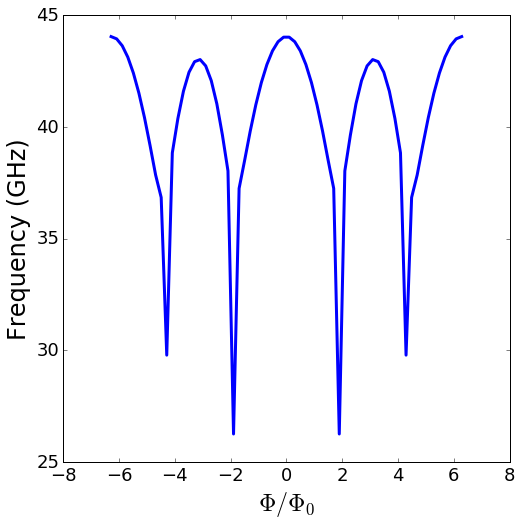

In [14]:
fig, axes = plt.subplots(figsize=(8, 8))

# original
#Z = np.real(U)
plt.plot(phi_range, (energies[:,1]-energies[:,0])/1e9, 'b', linewidth=3.0)
axes.set_xlabel(r'$\Phi/\Phi_0$', fontsize=24)
axes.set_ylabel(r'Frequency (GHz)', fontsize=24)

axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

#axes.set_ylim((0, 1))

#plt.plot(np.linspace(-6*np.pi, 6*np.pi, flux_steps), energies[:,1]-energies[:,0])
#plt.plot(np.linspace(-0.9*np.pi, -0.1*np.pi, flux_steps), (energies[:,2]-energies[:,0])/2)

#plt.plot(np.linspace(0, 2, flux_steps), (energies[:,2]-energies[:,1])/1e9, 'r', linewidth=3.0)
#plt.plot(np.linspace(-2*np.pi, 2*np.pi, flux_steps), energies[:,2]-energies[:,1])
#plt.plot(np.linspace(-2*np.pi, 2*np.pi, flux_steps), energies[:,3]-energies[:,2])

#plt.gcf().set_size_inches(10,8)
#plt.savefig("C:/neon/diagonalization_plot_6.pdf", bbox_inches="tight")